In [1]:
import datetime as dt
import pylab as plt
from matplotlib import style
import pandas_datareader.data as web
import pandas as pd

In [10]:
style.use("ggplot")

start = dt.datetime(2000, 1, 1)
end = dt.datetime(2020, 12, 12)

df = web.DataReader("TSLA", "yahoo", start, end)

df.to_csv("TSLA.csv")

In [21]:
df = pd.read_csv("TSLA.csv", parse_dates=True, index_col=0)

df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-07,648.789978,603.049988,604.919983,641.760010,56309700.0,641.760010
2020-12-08,651.280029,618.500000,625.510010,649.880005,64265000.0,649.880005
2020-12-09,654.320007,588.000000,653.690002,604.479980,71291200.0,604.479980
2020-12-10,627.750000,566.340027,574.369995,627.070007,67083200.0,627.070007
2020-12-11,624.000000,596.799988,615.010010,609.989990,46475000.0,609.989990


In [25]:
df["100ma"] = df["Adj Close"].rolling(window=100, min_periods=0).mean()
df.dropna(inplace=True)

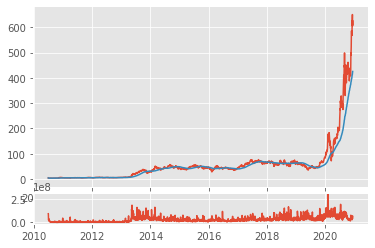

In [26]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df["Adj Close"])
ax1.plot(df.index, df["100ma"])
ax2.plot(df.index, df["Volume"])

plt.show()